# Imports

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import matplotlib
from matplotlib import rc
import numpy as np

import pandas as pd

from fcit import fcit

# Style definition

In [74]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
# plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14


# params = {'text.usetex' : True,
#           'font.size' : 14,
#           'legend.fontsize' : 14,
#           'font.family' : 'lmodern',
#           'text.latex.unicode': True,
#           'axes.grid': True,
#           'axes.labelweight': 'bold',
#          }
# plt.rcParams.update(params)

# Load analysis resutls

In [75]:
def process_data(data, lang):
    data["Delta G"] = data["F1 Male"] - data["F1 Female"]
    data["Delta T"] = data["T Male"] - data["T Female"]
    data["Delta F"] = data["F Male"] - data["T Female"]
    data["Delta lF"] = np.log(data["F Male"] - data["T Female"])
    data["Language"] = lang

    
    data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    data = data.reindex()
    return data[["translation", "Delta G", "Delta T", "Delta lF", "Language"]]

In [76]:
rename_dict= {"F1 Male": "F1", "F1 Female": "F1",
             "T Male": "Tokens", "T Female": "Tokens",
             "F Male": "Frequency", "F Female": "Frequency"}


def process_data2(data, lang):
    data = data[~data.isin([np.nan, np.inf, -np.inf, 0]).any(1)]
    data_mp = data[["translation", "F1 Male", "T Male", "F Male"]][data['stereotype'] =='Male']
    data_ma = data[["translation", "F1 Male", "T Male", "F Male"]][data['stereotype'] =='Female']
    
    data_fa = data[["translation", "F1 Female", "T Female", "F Female"]][data['stereotype'] =='Male']
    data_fp = data[["translation", "F1 Female", "T Female", "F Female"]][data['stereotype'] =='Female']
    
    data_mp = data_mp.rename(columns=rename_dict)
    data_ma = data_ma.rename(columns=rename_dict)
    data_fp = data_fp.rename(columns=rename_dict)
    data_fa = data_fa.rename(columns=rename_dict)
    
    data_mp["Gender"] = "M pro"
    data_ma["Gender"] = "M anti"
    data_fp["Gender"] = "F pro"
    data_fa["Gender"] = "F anti"
    
    
    
    data = pd.concat([data_mp, data_ma, data_fa, data_fp])
    data["Language"] = lang
    
    data["log Frequency"] = np.log(data["Frequency"])
    return data[["translation", "F1", "Tokens", "log Frequency", "Gender"]]

In [77]:
de_data = pd.read_csv('../data/data_analysis_opus100_de.csv')
he_data = pd.read_csv('../data/data_analysis_opus100_he.csv')

de_data2 =  process_data2(de_data, "German")
he_data2 =  process_data2(he_data, "Hebrew")

/tmp/ipykernel_7202/171263364.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data[~data.isin([np.nan, np.inf, -np.inf, 0]).any(1)]
/tmp/ipykernel_7202/171263364.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data[~data.isin([np.nan, np.inf, -np.inf, 0]).any(1)]


In [78]:
de_data = pd.read_csv('../data/data_analysis_opus100_de.csv')
he_data = pd.read_csv('../data/data_analysis_opus100_he.csv')

de_data = process_data(de_data, "German")
he_data = process_data(he_data, "Hebrew")

data = pd.concat([de_data, he_data])

/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_7202/3541290111.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWar

In [79]:
default_palette = sns.color_palette(np.array(sns.color_palette("Paired"))[[1,0,5,4]])

/tmp/ipykernel_7202/3591366978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_r = de_data2.corr(method='spearman').to_numpy()
/tmp/ipykernel_7202/3591366978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_p = de_data2.corr(method=lambda x, y: spearmanr(x, y)[1]).to_numpy()
/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


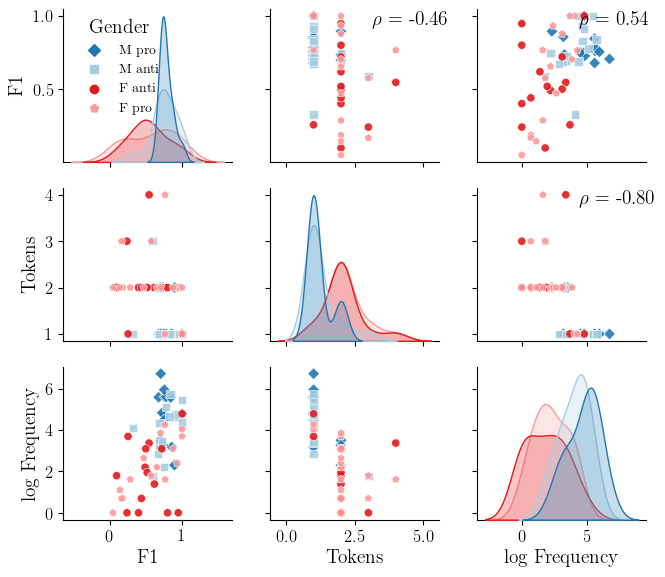

In [80]:
spearman_r = de_data2.corr(method='spearman').to_numpy()
spearman_p = de_data2.corr(method=lambda x, y: spearmanr(x, y)[1]).to_numpy()

#plt.figure(figsize=(3.5,3.5))
plot1 = sns.pairplot(de_data2, hue="Gender",
                     markers=['D','s', 'o', 'p'],
                     palette=default_palette,
                     plot_kws={'alpha': 0.9},
                    size=2)

plot1._legend.set_bbox_to_anchor((.25, 0.85))
# plt.legend(loc='center right', title='Type')
plot1.map
axes = plot1.axes
for i in range(2):
    for j in range(i+1,3):
        ax = axes[i][j]
        r = spearman_r[i,j]
        p = spearman_p[i,j]
        ax.annotate(r"$\rho$ = {:.2f}".format(r), xy=(.6, .9), xycoords=ax.transAxes)
#         ax.annotate(r"$p$ = {:.4f}".format(p), xy=(.7, .8), xycoords=ax.transAxes)
plt.tight_layout()
plt.savefig(f"../graphs/pairplot_de.pdf", dpi=300)


In [81]:
spearman_p

array([[1.00000000e+00, 2.83513817e-04, 1.47999636e-05],
       [2.83513817e-04, 1.00000000e+00, 4.68913103e-14],
       [1.47999636e-05, 4.68913103e-14, 1.00000000e+00]])

/tmp/ipykernel_7202/211156499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_r = he_data2.corr(method='spearman').to_numpy()
/tmp/ipykernel_7202/211156499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_p = he_data2.corr(method=lambda x, y: spearmanr(x, y)[1]).to_numpy()
/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


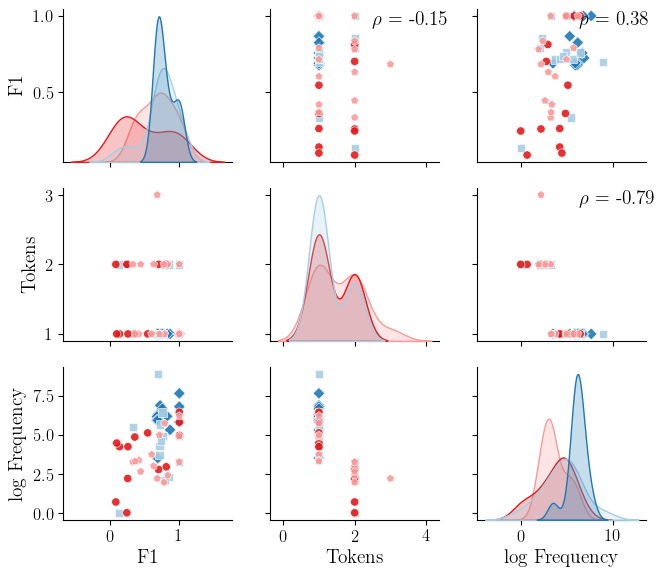

In [82]:
spearman_r = he_data2.corr(method='spearman').to_numpy()
spearman_p = he_data2.corr(method=lambda x, y: spearmanr(x, y)[1]).to_numpy()

# plt.figure(figsize=(2,2))
plot1 = sns.pairplot(he_data2, hue="Gender",
                     markers=['D','s', 'o', 'p'],
                     palette=default_palette,
                     plot_kws={'alpha': 0.9},
                    size=2)

plot1._legend.remove()
plot1.map
axes = plot1.axes
for i in range(2):
    for j in range(i+1,3):
        ax = axes[i][j]
        r = spearman_r[i,j]
        ax.annotate(r"$\rho$ = {:.2f}".format(r), xy=(.6, .9), xycoords=ax.transAxes)
plt.tight_layout()
plt.savefig(f"../graphs/pairplot_he.pdf", dpi=300)

In [83]:
spearman_p

array([[1.00000000e+00, 2.83629992e-01, 4.27667983e-03],
       [2.83629992e-01, 1.00000000e+00, 1.25594319e-12],
       [4.27667983e-03, 1.25594319e-12, 1.00000000e+00]])

### Conditional indepence

In [84]:
def check_dependence(data):
    x = np.expand_dims(data["F1"].to_numpy(), axis=1)
    y = np.expand_dims(data["log Frequency"].to_numpy(), axis=1)
    z = np.expand_dims(data["Tokens"].to_numpy(), axis=1)
    
    pval_d = fcit.test(x,y)
    pval_i = fcit.test(x,y,z)
    print(f"Dependence p-value: {pval_d}")
    print(f"Conditional independence p-value: {pval_i}")
    

In [85]:
check_dependence(de_data2)

Dependence p-value: 0.028924527347627266
Conditional independence p-value: 0.06773526462302099


In [86]:
check_dependence(he_data2)

/lnet/work/people/limisiewicz/mt-tokenizer-bias/.virtualenv/lib/python3.8/site-packages/fcit/fcit.py:193: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p_value = ttest_1samp(d0_stats / d1_stats, 1)


Dependence p-value: nan
Conditional independence p-value: 0.16414875015090757


## Save new data frames 

In [87]:
de_data2.to_csv('../data/data_analysis_opus100_de_new.csv')
he_data2.to_csv('../data/data_analysis_opus100_he_new.csv')

## Correlation of $\Delta$s

/tmp/ipykernel_7202/3694615406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = data.corr(method='spearman').to_numpy()


<Figure size 350x350 with 0 Axes>

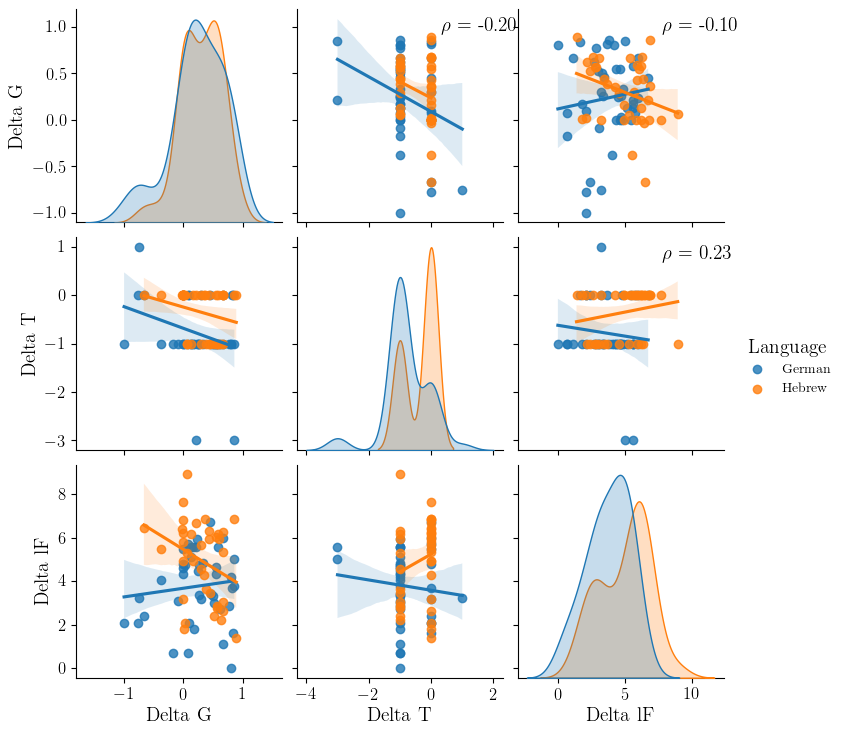

In [88]:
corr1 = data.corr(method='spearman').to_numpy()

plt.figure(figsize=(3.5,3.5))
plot1 = sns.pairplot(data, kind='reg', hue="Language")
plot1.map
axes = plot1.axes
for i in range(2):
    for j in range(i+1,3):
        ax = axes[i][j]
        r = corr1[i,j]
        ax.annotate(r"$\rho$ = {:.2f}".format(r), xy=(.7, .9), xycoords=ax.transAxes)

/tmp/ipykernel_7202/2678148116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = de_data.corr(method='spearman').to_numpy()


<Figure size 350x350 with 0 Axes>

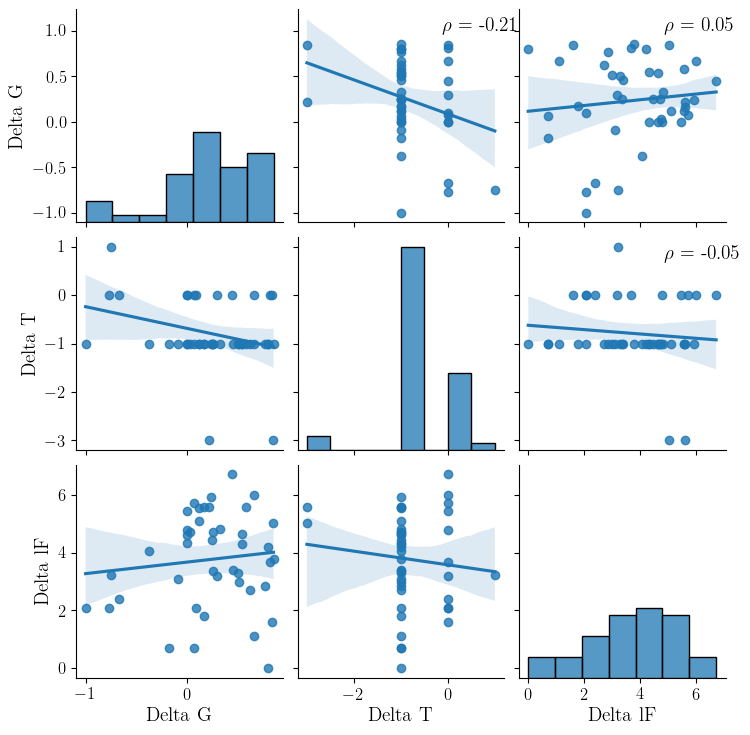

In [89]:
corr1 = de_data.corr(method='spearman').to_numpy()

plt.figure(figsize=(3.5,3.5))
plot1 = sns.pairplot(de_data, kind='reg')
plot1.map
axes = plot1.axes
for i in range(2):
    for j in range(i+1,3):
        ax = axes[i][j]
        r = corr1[i,j]
        ax.annotate(r"$\rho$ = {:.2f}".format(r), xy=(.7, .9), xycoords=ax.transAxes)

## corr1 = he_data.corr(method='spearman').to_numpy()

plt.figure(figsize=(3.5,3.5))
plot1 = sns.pairplot(he_data, kind='reg')
plot1.map
axes = plot1.axes
for i in range(2):
    for j in range(i+1,3):
        ax = axes[i][j]
        r = corr1[i,j]
        ax.annotate(r"$\rho$ = {:.2f}".format(r), xy=(.7, .9), xycoords=ax.transAxes)